# Lab | ML1

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data=pd.read_csv('Data/marketing_customer_analysis.csv') 
data.tail(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [6]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
numerical=data.select_dtypes(include=np.number)
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [8]:
categorical=data.select_dtypes(object)
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Utilizo algunos códigos del Lab Py-5-2 para realizar visualizaciones:

#### Histograms

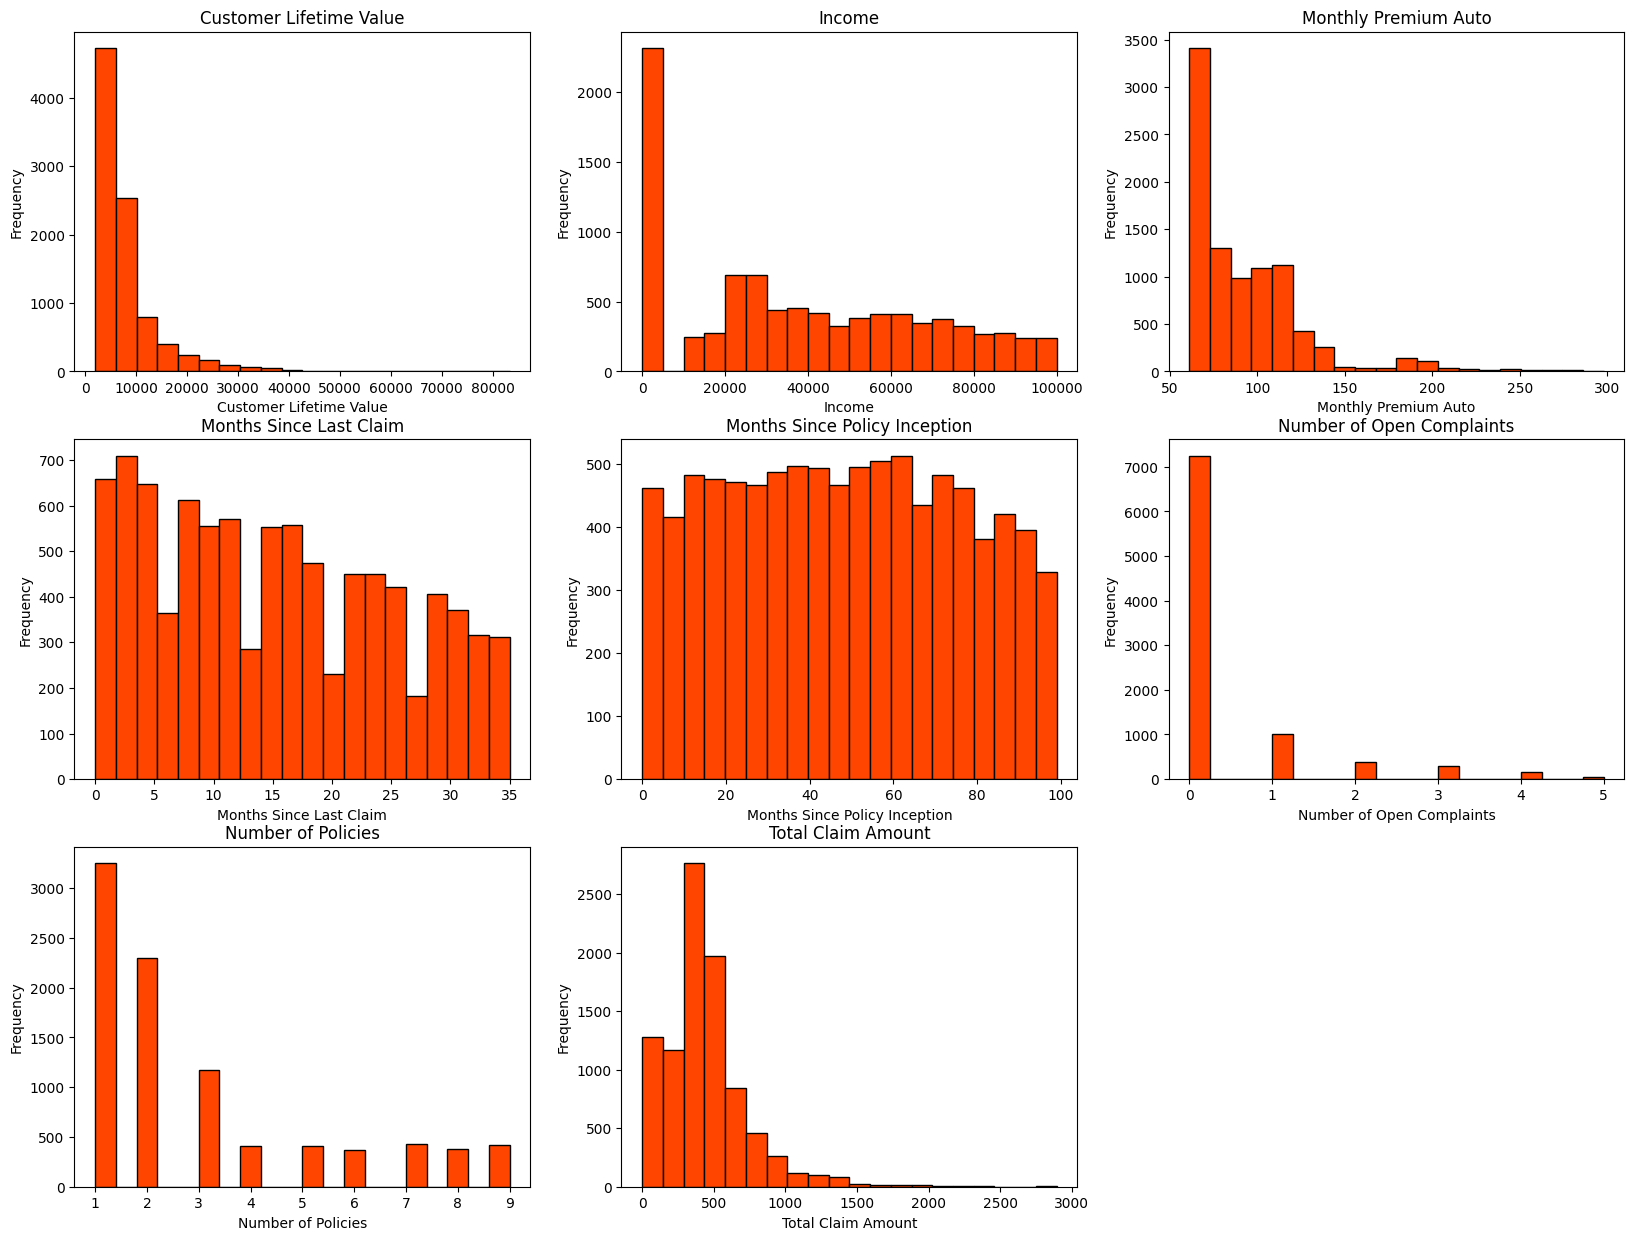

In [10]:
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs[0, 0].hist(numerical["Customer Lifetime Value"], bins=20, color='orangered', edgecolor='black')
axs[0, 0].set_title("Customer Lifetime Value")
axs[0, 0].set_xlabel("Customer Lifetime Value")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(numerical["Income"], bins=20, color='orangered', edgecolor='black')
axs[0, 1].set_title("Income")
axs[0, 1].set_xlabel("Income")
axs[0, 1].set_ylabel("Frequency")

axs[0, 2].hist(numerical["Monthly Premium Auto"], bins=20, color='orangered', edgecolor='black')
axs[0, 2].set_title("Monthly Premium Auto")
axs[0, 2].set_xlabel("Monthly Premium Auto")
axs[0, 2].set_ylabel("Frequency")

axs[1, 0].hist(numerical["Months Since Last Claim"], bins=20, color='orangered', edgecolor='black')
axs[1, 0].set_title("Months Since Last Claim")
axs[1, 0].set_xlabel("Months Since Last Claim")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(numerical["Months Since Policy Inception"], bins=20, color='orangered', edgecolor='black')
axs[1, 1].set_title("Months Since Policy Inception")
axs[1, 1].set_xlabel("Months Since Policy Inception")
axs[1, 1].set_ylabel("Frequency")

axs[1, 2].hist(numerical["Number of Open Complaints"], bins=20, color='orangered', edgecolor='black')
axs[1, 2].set_title("Number of Open Complaints")
axs[1, 2].set_xlabel("Number of Open Complaints")
axs[1, 2].set_ylabel("Frequency")

axs[2, 0].hist(numerical["Number of Policies"], bins=20, color='orangered', edgecolor='black')
axs[2, 0].set_title("Number of Policies")
axs[2, 0].set_xlabel("Number of Policies")
axs[2, 0].set_ylabel("Frequency")

axs[2, 1].hist(numerical["Total Claim Amount"], bins=20, color='orangered', edgecolor='black')
axs[2, 1].set_title("Total Claim Amount")
axs[2, 1].set_xlabel("Total Claim Amount")
axs[2, 1].set_ylabel("Frequency")

fig.delaxes(axs[2, 2]) # Eliminar el subplot vacío
plt.show()

La gráficas que más se asemejan a una distribución normal son la de 'Months Since Policy Inception' y la de 'Income' (si quitamos los valores de Income=0). De todas formas, se parecen más a una distribución uniforme por lo que ninguna gráfica tiene forma de normal.

#### Heatmap

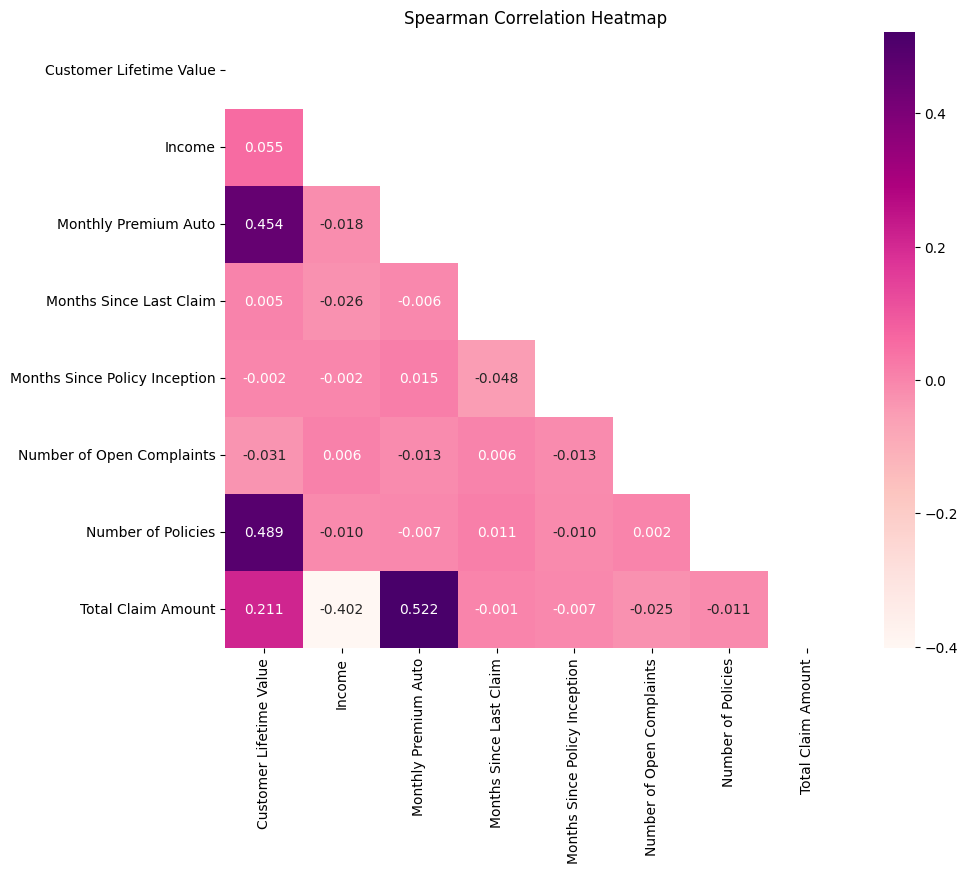

In [18]:
correlation_matrix=numerical.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu", fmt=".3f", mask=mask)
plt.title("Spearman Correlation Heatmap")
plt.show()

No hay valores superiores a 0.9 por lo que no hay que droppear columnas.

#### Correlation Matrix

In [23]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


### Linear Regressions

#### 1) Using statsmodels

In [12]:
#Definimos 'Total Claim Amount' como la variable dependiente (target), y al vector X compuesto por las variables numéricas
#independientes, cargándonos la variable Y dentro de X.

Y=data['Total Claim Amount'] 
X=numerical.drop(['Total Claim Amount'], axis=1) 
X=sm.add_constant(X) #Forzamos al modelo para que tenga una ordenada en el origen.
model=sm.OLS(Y,X).fit()  

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:43:33   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### Observaciones:
- R^2 > 0.5 --> OK. De haber dado menor a 0.5, habría que mejorar el modelo. A su vez, R^2 ajustada también dio mayor a 0.5. Eso es un indicador positivo porque la misma contempla los sesgos.
- Los P >| t | < 0.1 están OK (Customer Lifetime Value, Income y Monthly Premium Auto).
- Los coefs son los pesos/ponderaciones de cada variable independiente. 'Monthtly Premium Auto' es el que tiene el mayor peso con un coef ~ 5.3. Tiene lógica porque a los clientes con gran potencial de generar gastos elevados para la aseguradora, se los va a cargar con una alta cuota mensual. 'Number of Open Complaints' tiene coef ~-1.37, lo cual también tiene sentido ya que si hay varias quejas, probablemente tengan que ver con el dinero (entre otras cosas). El resto influyen muy poco en la variable dependiente.

#### 2) Using sklearn

In [13]:
Y=data['Total Claim Amount'] 
X=numerical.drop(['Total Claim Amount'], axis=1) 

lm=linear_model.LinearRegression()
model=lm.fit(X,Y)
print("R2 value is=",round(lm.score(X,Y),2))

R2 value is= 0.52


In [32]:
predictions = lm.predict(X) 
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse)

R2 value is =  0.52
The intercept of the model is =  72.39096819184152
The coefficients of the model are =  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The mse of the model is =  40615.74326224917


##### Observaciones:
- Los valores de R2, ordenada en el origen y coefs coinciden en ambos modelos. Eso da confianza sobre la validez de los mismos.
- sklearn devuelve menos información que statsmodel, pero a los efectos de esta entrega, lo que da sklearn es suficiente (sklearn es de más alto nivel).
- Por otro lado, en mi opinión el mse~40615 (mean square error) dio "bastante grande". Esto indica que el modelo no es del todo preciso.